In [2]:
import numpy as np
import pandas as pd

users_num = 10000

df = pd.DataFrame()
df['user'] = range(users_num)
df['group'] = np.random.rand(users_num) < 0.5

df['user_mean'] = np.random.lognormal(mean=np.log(1000), sigma=0.5, size=users_num)
df['cost_before'] = np.abs(
    df['user_mean'] + np.random.normal(0, 100, size=users_num)
)
df['cost'] = np.abs(
    df['user_mean'] + np.random.normal(50, 100, size=users_num)
)

In [3]:
df

,user,group,user_mean,cost_before,cost
0,0,False,1573.875011,1703.111297,1636.333467
1,1,True,509.426457,689.472252,587.681102
2,2,False,946.729007,878.669967,958.788182
3,3,False,1411.760027,1451.745774,1522.512462
4,4,False,554.551321,345.053960,608.296250
...,...,...,...,...,...
9995,9995,True,1480.429138,1459.131980,1499.502393
9996,9996,True,859.733785,1045.217094,1003.610795
9997,9997,True,920.316522,899.249018,857.565654
9998,9998,True,1196.222568,1291.730387,1285.035081


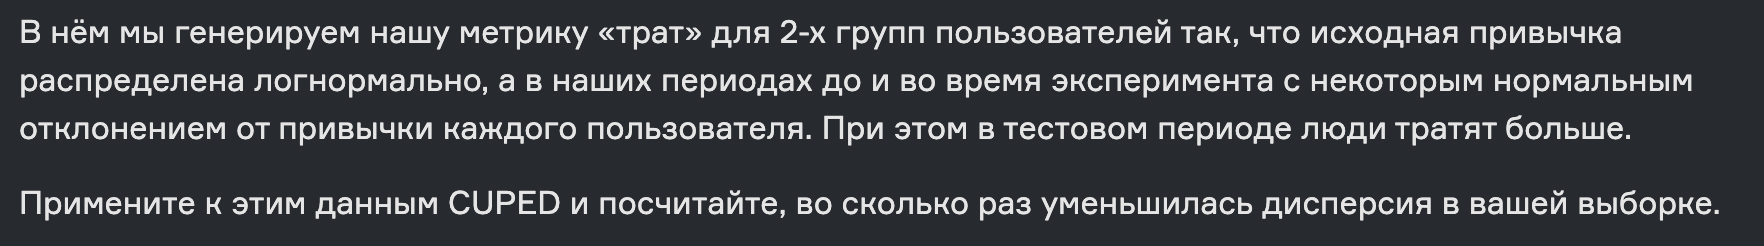

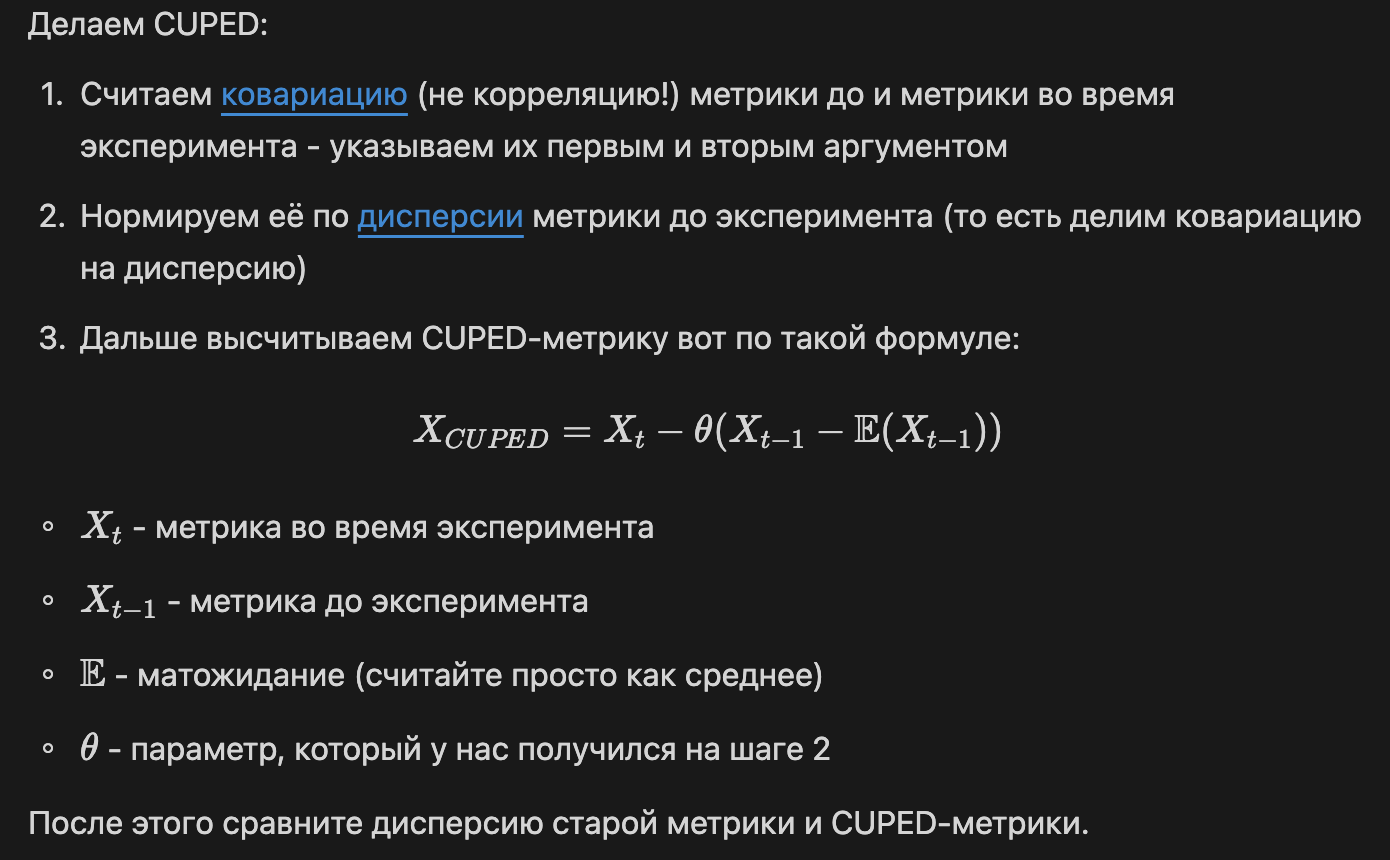

In [13]:
theta = np.cov(df['cost_before'], df['cost'])[0, 1] / np.var(df['cost_before'])
E_x = np.mean(df['cost_before'])
df['cuped'] = df['cost'] - theta * (df['cost_before'] - E_x)
print(f'Дисперсия до CUPED {np.var(df['cost_before'])}, дисперсия после {np.var(df['cuped'])}')
print(f'Дисперсия уменьшилась в {np.var(df['cost_before']) / np.var(df['cuped'])} раза')

Дисперсия до CUPED 370132.90483764414, дисперсия после 19904.65012385063
Дисперсия уменьшилась в 18.595298210950943 раза


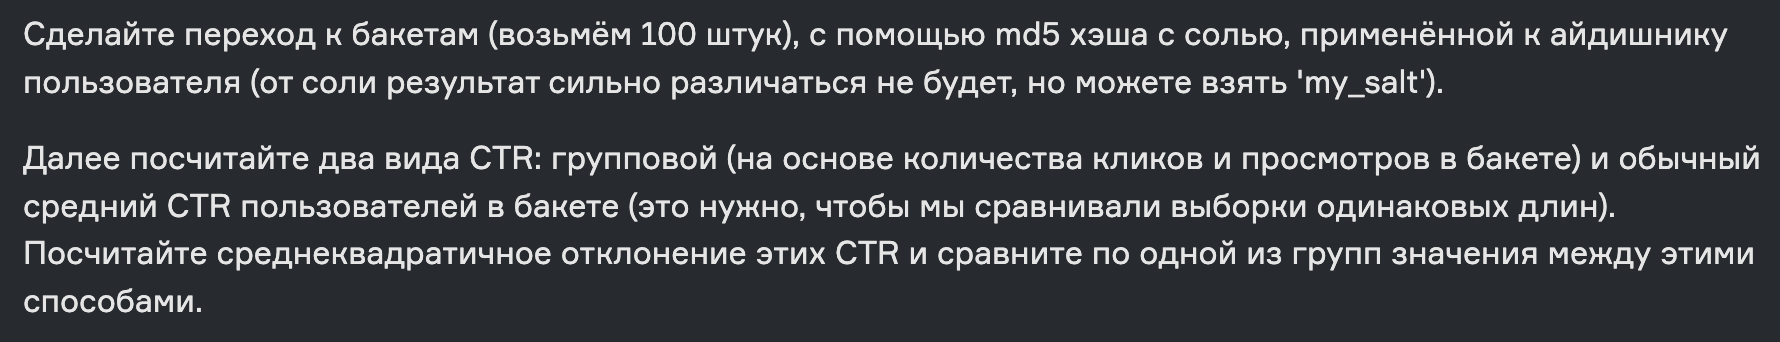

In [57]:
np.random.seed(6)

users_num = 10000
mean_user_ctr = 0.2
beta = 20
alpha = mean_user_ctr * beta / (1 - mean_user_ctr)

df = pd.DataFrame()
df['user'] = range(users_num)
df['group'] = np.random.rand(users_num) < 0.5

df['base_user_ctr'] = np.random.beta(alpha, beta, size=users_num)
df['views'] = np.random.lognormal(mean=1, sigma=1, size=users_num).astype(int) + 1
df['clicks'] = np.random.binomial(df['views'], df['base_user_ctr'])

import hashlib

df['bucket'] = df['user'].apply(
    lambda x: int(hashlib.md5((str(x) + 'my_salt').encode()).hexdigest(), 16) % 100
)

In [58]:
df

,user,group,base_user_ctr,views,clicks,bucket
0,0,False,0.322688,2,2,33
1,1,True,0.182517,6,1,97
2,2,False,0.260975,6,3,57
3,3,True,0.260439,2,0,95
4,4,True,0.332355,1,1,80
...,...,...,...,...,...,...
9995,9995,False,0.216499,25,5,24
9996,9996,False,0.259650,2,1,43
9997,9997,True,0.268912,2,0,34
9998,9998,True,0.147879,4,0,86


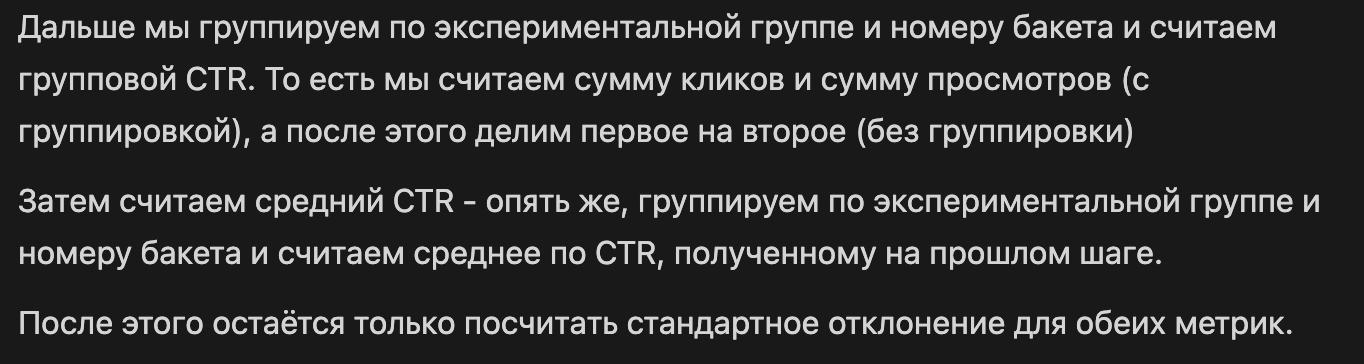

In [59]:
bucket_stats = df.groupby(['group','bucket']).agg(
    views=('views', 'sum'),
    clicks=('clicks', 'sum')
).reset_index()

df['ctr_user'] = df['clicks'] / df['views']

avg_ctr_per_bucket = df.groupby(['group', 'bucket']).agg(
    avg_ctr=('ctr_user', 'mean')
).reset_index()


bucket_group_ctr = bucket_stats.clicks / bucket_stats.views
bucket_avg_ctr = avg_ctr_per_bucket.avg_ctr

std_group_ctr = np.std(bucket_group_ctr)
std_avg_ctr = np.std(bucket_avg_ctr)
print(f'Среднее квадратичное отклонение группового CTR: {std_group_ctr}, \n Среднее квадратичное отклонение обычного среднего CTR: {std_avg_ctr}')




Среднее квадратичное отклонение группового CTR: 0.027380712995445006, 
 Среднее квадратичное отклонение обычного среднего CTR: 0.035400626660559764


In [60]:
# #НЕПРАВИЛЬНОЕ

# bucket_stats = df.groupby(['group','bucket']).agg(
#     views=('views', 'sum'),
#     clicks=('clicks', 'sum'),
#     avg_user_ctr=('base_user_ctr', 'mean')
# ).reset_index()

# bucket_group_ctr = bucket_stats.clicks / bucket_stats.views
# bucket_avg_ctr = bucket_stats.avg_user_ctr

# std_group_ctr = np.std(bucket_group_ctr)
# std_avg_ctr = np.std(bucket_avg_ctr)
# print(f'Среднее квадратичное отклонение группового CTR: {std_group_ctr}, \n Среднее квадратичное отклонение обычного среднего CTR: {std_avg_ctr}')




Среднее квадратичное отклонение группового CTR: 0.027380712995445006, 
 Среднее квадратичное отклонение обычного среднего CTR: 0.011413230055760342
